### glacier visulization and analysis in hma and subregions.


In [7]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs 

#### 1. Select glaciers in the HMA region.

In [2]:
path_hma = 'data/glacier-extent/rgi70/hma_rgi70.gpkg'
path_hma_gtng = 'data/hma-extent/HMA/gtng_202307_hma_subregions.gpkg'


In [11]:
## Read data
## hma vector
hma_vec_gdf = gpd.read_file(path_hma_gtng)
hma_vec_gdf = hma_vec_gdf.to_crs(ccrs.PlateCarree().proj4_init) ## geographic crs to projected crs
## glacier data
rgi70_hma = gpd.read_file(path_hma)
print(rgi70_hma.shape)
rgi70_hma.head(2)


(131762, 29)


,rgi_id,o1region,o2region,glims_id,anlys_id,subm_id,src_date,cenlon,cenlat,utm_zone,...,zmin_m,zmax_m,zmed_m,zmean_m,slope_deg,aspect_deg,aspect_sec,dem_source,lmax_m,geometry
0,RGI2000-v7.0-G-13-00001,13,13-01,G067426E38743N,804440,752,2002-07-10T00:00:00,67.425881,38.743313,42,...,3693.8557,3783.9656,3727.2417,3728.6082,34.003925,26.572540,2,COPDEM30,151,"MULTIPOLYGON Z (((67.42669 38.74384 0, 67.4266..."
1,RGI2000-v7.0-G-13-00002,13,13-01,G067480E38714N,804446,752,2002-07-10T00:00:00,67.479616,38.714583,42,...,3839.7866,3899.8672,3873.0503,3870.6500,29.506857,344.175386,1,COPDEM30,181,"MULTIPOLYGON Z (((67.48079 38.71486 0, 67.4807..."


#### glaciers in hma region

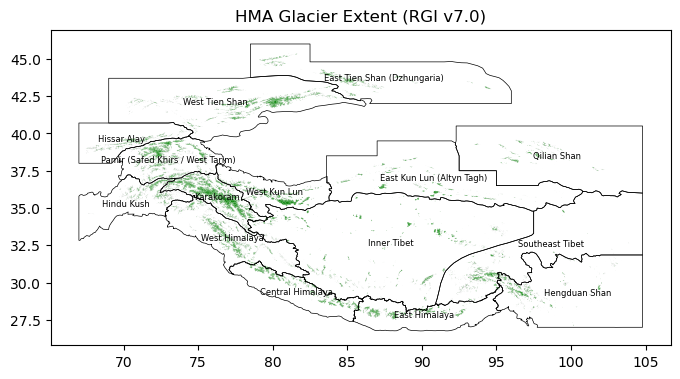

In [ ]:
### Visualization
fig, ax = plt.subplots(1,1, figsize=(8,5))
rgi70_hma.plot(color='green', edgecolor='none', ax = ax)
hma_vec_gdf.plot(color='none', edgecolor='black', linewidth=0.5, ax = ax)
geo_centers = hma_vec_gdf.geometry.centroid
for x, y, label in zip(geo_centers.x, geo_centers.y, hma_vec_gdf['full_name']):
    ax.text(x, y, label, fontsize=6, ha='center', va='center')
ax.set_title('HMA Glacier Extent (RGI v7.0)')
# fig.savefig('figures/glacier-extent/hma_glacier_extent.png', dpi=300, bbox_inches='tight')


In [7]:
print(f'Number of hma glaciers: {rgi70_hma.shape[0]}')
print(f"Area of ham glaciers: {rgi70_hma['area_km2'].sum()} km2")


Number of hma glaciers: 131762
Area of ham glaciers: 99468.40409602714 km2


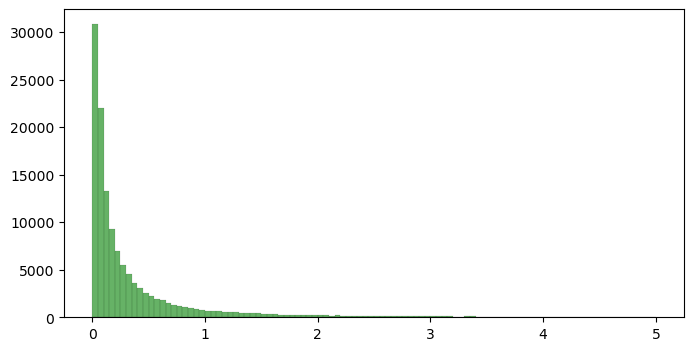

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(8,4))
ax.hist(rgi70_hma['area_km2'], bins=100, color='green', alpha=0.6,
              edgecolor='black',  range=(0, 5), linewidth=0.1);
# fig.savefig('figures/glacier-extent/hma_glacier_area_histogram.png', dpi=300, bbox_inches='tight')


#### glacier in hma subregions

In [9]:
# Calculate glacier number and area for each o2region
glacier_subregion_stats = rgi70_hma.groupby('o2region').agg(
  glacier_number = ('rgi_id', 'count'),
  total_area_km2 = ('area_km2', 'sum'),
).reset_index()
hma_vec_gdf_ = hma_vec_gdf.loc[:,['o2region', 'full_name', 'geometry']]
hma_subregion_gla_stats = pd.merge(hma_vec_gdf_, glacier_subregion_stats, on='o2region')
hma_subregion_gla_stats.head(2)


,o2region,full_name,geometry,glacier_number,total_area_km2
0,13-01,Hissar Alay,"MULTIPOLYGON (((70 40.7, 71 40.7, 72.01 40.7, ...",5340,1953.552508
1,13-02,Pamir (Safed Khirs / West Tarim),"MULTIPOLYGON (((74.35547 39.80418, 74.37581 39...",15744,10465.310388


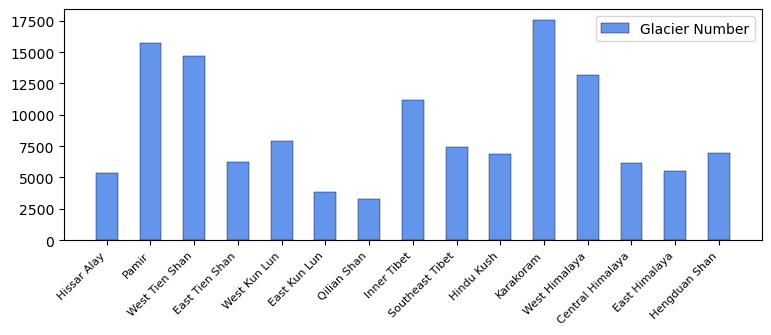

In [10]:
## Plot glacier number per subregion
name_subregions = [name.split(' (')[0] for name in hma_subregion_gla_stats['full_name'].values] 
fig, ax = plt.subplots(figsize=(9, 3))
ax.bar(name_subregions, hma_subregion_gla_stats['glacier_number'], 
                                  width=0.5, edgecolor='black', linewidth=0.3, 
                                  color='cornflowerblue', label='Glacier Number')
ax.set_xticks(np.arange(len(name_subregions)), 
                        labels=name_subregions, rotation=45, ha='right', fontsize=8)
ax.legend()
# fig.savefig('figures/glacier-extent/hma_subregion_glacier_number.png', dpi=300, bbox_inches='tight')

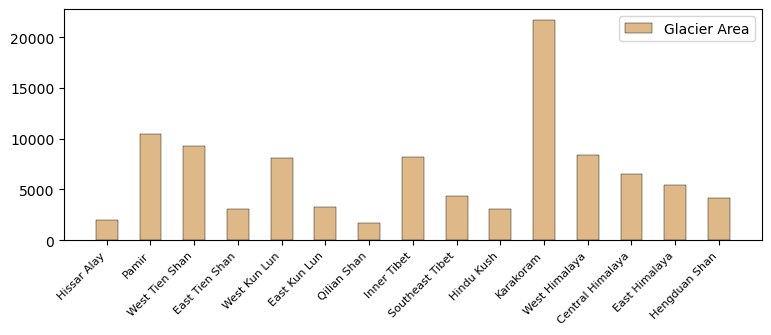

In [11]:
## Plot glacier area per subregion
fig, ax = plt.subplots(figsize=(9, 3))
ax.bar(name_subregions, hma_subregion_gla_stats['total_area_km2'], 
                                  width=0.5, color='burlywood', edgecolor='black', 
                                  linewidth=0.3, label='Glacier Area')
ax.set_xticks(np.arange(len(name_subregions)), 
                        labels=name_subregions, rotation=45, ha='right', fontsize=8)
ax.legend()
# fig.savefig('figures/glacier-extent/hma_subregion_glacier_area.png', dpi=300, bbox_inches='tight')
